# __SSD Demo__

In [1]:
from detect import *
from PIL import Image, ImageDraw, ImageFont
from torchvision import transforms
import warnings
warnings.filterwarnings('ignore')
import torch

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## __Load Model__

In [3]:
# Load model checkpoint
checkpoint = './data/BEST_checkpoint_ssd300.pth.tar'
checkpoint = torch.load(checkpoint)
start_epoch = checkpoint['epoch'] + 1
best_loss = checkpoint['best_loss']
print('\nLoaded checkpoint from epoch %d. Best loss so far is %.3f.\n' % (start_epoch, best_loss))
model = checkpoint['model']
model = model.to(device)
model.eval()


Loaded checkpoint from epoch 67. Best loss so far is 2.775.



SSD300(
  (base): VGGBase(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), 

## __Load Image__

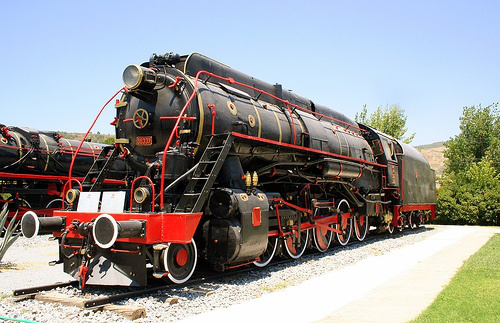

In [14]:
img_path = './VOCdevkit/VOC2007/JPEGImages/000095.jpg'
original_image = Image.open(img_path, mode='r')
original_image = original_image.convert('RGB')
original_image

## __SSD Forward Prop__

In [15]:
imgg = detect(model, original_image, min_score=0.2, max_overlap=0.5, top_k=200)

## __View Detection Results__

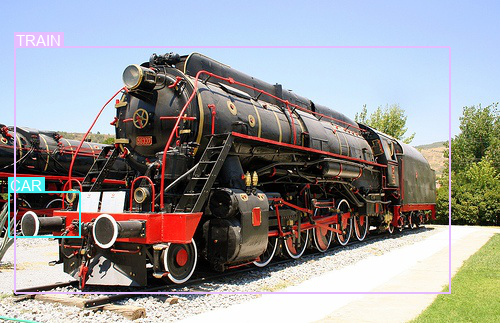

In [16]:
imgg